## Сихронизация по светодиодной линии

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
#from tqdm import tqdm
#import math as mt
import numpy as np
import seaborn as sns

In [389]:
# считать данные, заменив 0 на NaN
na_values = ['N/A', '0']
datum11588 = pd.read_csv('./data/11588.work.csv', na_values=na_values, header = None, index_col=False, sep=',')
datum11589 = pd.read_csv('./data/11589.work.csv', na_values=na_values, header = None, index_col=False, sep=',')
datum11308 = pd.read_csv('./data/11308.work.csv', na_values=na_values, header = None, index_col=False, sep=',')
datum11452 = pd.read_csv('./data/11452.work.csv', na_values=na_values, header = None, index_col=False, sep=',')
datum12114 = pd.read_csv('./data/12114.work.csv', na_values=na_values, header = None, index_col=False, sep=',')

# убрать последние три канала
param = [i for i in range(109)]
datum11588 = datum11588[param]
datum11589 = datum11589[param]
datum11308 = datum11308[param]
datum11452 = datum11452[param]
datum12114 = datum12114[param]

# отрицательные значения заменить на маленькое положительное 0.001
# маленькие значения заменить на маленькое положительное minpos
minpos = 0.0001
data = [datum11588, datum11589,datum11308, datum11452, datum12114]
for datum in data:
    for i in range(datum.shape[1]):
        zero_cell = datum[i] <= 0.01
        datum.loc[zero_cell, i] = minpos
    datum.fillna(0.001, inplace = True)

In [360]:
datum11588.head(12)

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,0.0001,0.0001,0.0001,0.0001,1.1000,0.5000,0.0001,0.9500,1.0500,0.3800,...,0.0900,0.0001,0.0001,0.0001,0.5400,0.0001,1.0700,0.0001,0.0001,0.0001
1,0.1900,0.9800,0.0001,0.0001,0.0001,0.5500,0.9200,0.6700,0.5500,0.3200,...,0.1400,0.2000,0.6800,0.0001,0.4800,0.0001,0.6800,0.0001,0.0001,0.0001
2,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.8400,0.9500,0.0500,0.3800,...,1.0900,0.6000,0.6100,0.0001,0.5400,0.3100,1.0700,0.0001,0.0001,0.0500
3,0.1900,0.0001,0.1200,0.8000,0.0001,0.0001,0.0001,0.0001,0.5500,0.0001,...,0.1400,0.2000,0.6800,0.0001,0.4800,0.0001,0.0001,0.5800,0.0001,0.0001
4,0.1300,0.0001,0.4700,0.6400,0.1000,0.0001,0.0001,0.0001,0.0500,0.0001,...,0.0900,0.0001,0.0001,0.0900,0.0001,0.0001,0.0700,0.0001,0.6900,0.0500
5,0.0001,0.0001,0.1200,0.8000,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.1400,0.2000,0.0001,0.0001,0.4800,0.0001,0.0001,0.0001,0.0001,0.4400
6,0.0001,0.0001,0.0001,0.0001,1.1000,0.5000,0.0001,0.0001,0.0500,0.0001,...,0.0900,0.6000,0.0001,0.0900,0.5400,0.3100,0.0700,0.0001,0.0001,0.0500
7,0.0001,0.0001,0.0001,0.0001,0.0001,0.5500,0.0001,0.6700,0.0001,0.0001,...,0.1400,0.2000,0.0001,0.0001,0.4800,0.3700,0.6800,0.0001,0.5000,0.4400
8,0.1300,0.0001,0.0001,0.0001,0.0001,0.5000,0.8400,1.9500,1.0500,0.0001,...,0.0001,0.6000,0.6100,0.0900,0.5400,2.3100,0.0700,0.0001,0.6900,0.0500
9,0.1900,0.0001,0.0001,0.0001,0.0001,0.0001,0.9200,2.6700,1.5500,0.3200,...,0.1400,0.2000,1.6800,0.0001,0.0001,1.3700,0.6800,0.0001,0.0001,0.4400


In [400]:
sum11588 = datum11588[400:500].sum()
sum11589 = datum11589[400:950].sum()
sum11308 = datum11308[400:500].sum()
sum11452 = datum11452[400:500].sum()
sum12114 = datum12114[400:500].sum()
suma  = [sum11588, sum11589,sum11308, sum11452, sum12114]

In [391]:
data  = [datum11588, datum11589, datum11308, datum11452, datum12114]
frame = [datum11588, datum11589, datum11308, datum11452, datum12114]
suma  = [sum11588, sum11589,sum11308, sum11452, sum12114]
title = ['11588', '11589','11308','11452', '12114']

In [396]:
from matplotlib import colors

import retina
x=retina.x
y=retina.y
C=retina.C
N=retina.N

xmin = min(x)-3
xmax = max(x)+3
ymin = min(y)-1
ymax = max(y)+1

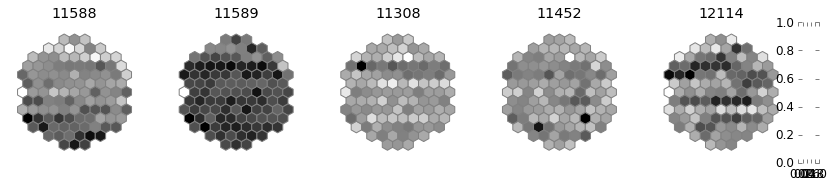

In [397]:
nn=5
fig, axn = plt.subplots(1, nn, sharex=True, sharey=True, figsize=(14,2.5))
#cmap = colors.ListedColormap(['white', 'yellow', 'orange'])
plt.rcParams['axes.linewidth'] = 0.0
plt.rcParams['font.size'] = 12
cbar_ax  = fig.add_axes([.91, .12, .02, .78])
cbar_kws = {"label":'log10 (A)'}

#for (i, ax), datum in zip(enumerate(axn.flat), data):
for i in range(nn):
    hb = axn[i].hexbin(x, y, C=np.log(suma[i]),gridsize=(10,6), 
                       cmap="gist_yarg", edgecolor='gray',                
                #cbar_ax  = None if i else cbar_ax,
                #cbar_kws = None if i else cbar_kws
                )
    axn[i].axis([xmin, xmax, ymin, ymax])
    axn[i].axes.get_xaxis().set_visible(False)
    axn[i].axes.get_yaxis().set_visible(False)
    axn[i].set_title(title[i])    

In [394]:
suma

[0       467.8507
 1      1057.0447
 2       517.8520
 3       266.1243
 4       320.3248
 5       234.0056
 6       665.8041
 7      1250.6145
 8      1042.2026
 9       337.5030
 10      990.1231
 11      254.7735
 12      285.6342
 13      281.8336
 14      248.0632
 15      167.2652
 16      334.6337
 17      348.5448
 18     1571.3639
 19      641.8441
 20      324.5939
 21      615.6639
 22      407.7646
 23      247.2658
 24      234.2038
 25       94.3431
 26      121.7020
 27      108.9452
 28       77.1739
 29      111.7230
          ...    
 79      191.4441
 80       43.6038
 81       99.7665
 82      117.0052
 83      136.8542
 84      181.4852
 85      196.9656
 86      189.2541
 87      200.9030
 88      345.3941
 89      197.5539
 90       35.3107
 91       61.1226
 92      124.5238
 93      135.6633
 94       59.9220
 95       66.7958
 96       43.7826
 97       22.2266
 98       44.9753
 99       39.7823
 100      29.2043
 101      40.7757
 102      20.7946
 103      

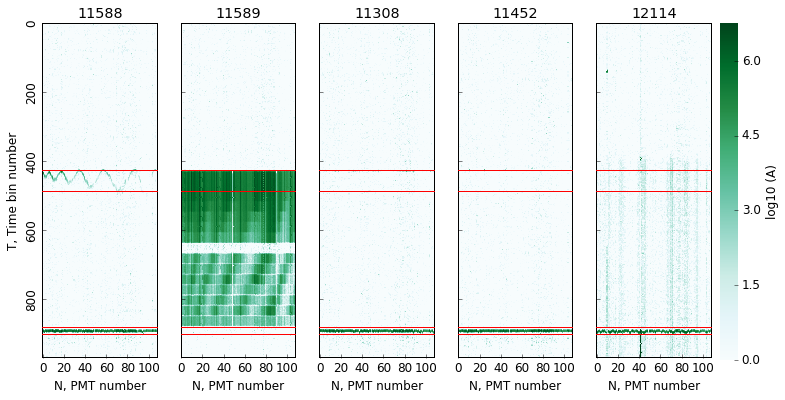

In [341]:
colorscale = "gist_yarg"
colorscale = "BuGn" #cool"

frame  = [datum11588, datum11589,datum11308, datum11452, datum12114]
#frame  = [newframe, datum11589,datum11308, datum11452, datum12114]
fig, axn = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(12,6))
cbar_ax  = fig.add_axes([.91, .12, .02, .78])
cbar_kws = {"label":'log10 (A)'}
cbar = False
xt, yt = 0, 0
xb, yb = 108, 969

for (i, ax), datum in zip(enumerate(axn.flat), frame):
    sns.heatmap(np.log(datum), ax=ax, cmap = colorscale,
                cbar=i == 0,
                vmin=0, 
                xticklabels=20, yticklabels=200,
                cbar_ax  = None if i else cbar_ax,
                cbar_kws = None if i else cbar_kws
               )
    ax.plot(( xt, xt),( yt, yb),'k')
    ax.plot(( xt, xb),( yb, yb),'k')
    ax.plot(( xb, xb),( yb, yt),'k')
    ax.plot(( xt, xb),( yt, yt),'k')
    ax.axhline(y=427,linewidth=1, color='r') 
    ax.axhline(y=487,linewidth=1, color='r') 
    ax.axhline(y=880,linewidth=1, color='r') 
    ax.axhline(y=900,linewidth=1, color='r') 
    ax.set_title(title[i])
    ax.set_xlabel('N, PMT number')
    if i == 0:
        ax.set_ylabel('T, Time bin number')

C:\Program Files\Anaconda\lib\site-packages\matplotlib\gridspec.py:302: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


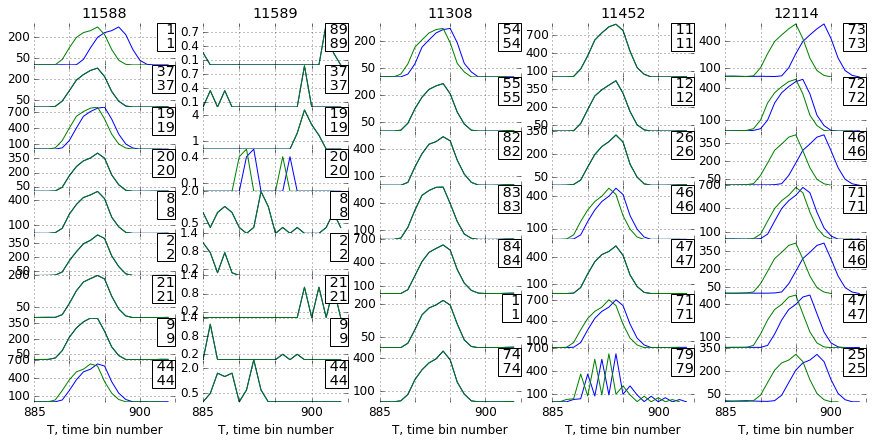

In [326]:
fig = plt.figure(figsize=(12,6))

frame = [datum11588, datum11589, datum11308, datum11452, datum12114]
data = [[0, 36, 18, 19,  7,  1, 20,  8, 43], # 11588
        [88, 36, 18, 19,  7,  1, 20,  8, 43], # 11589
        [53, 54, 81, 82, 83,  0, 73],         # 11308
        [10, 11, 25, 45, 46, 70, 78],         # 11452
        [72, 71, 45, 70, 45, 46, 24]]         # 12114
axmin = [885] * 5
axmax = [905] * 5
aylim = [(0), (0), (0), (0), (0)]
gs = []
dd = len(frame)
#gs = [gridspec.GridSpec(len(data[num]), 1) for num in range(dd)]

######### plot frames #################
num = 0
for num in range(dd):
    gscur = gridspec.GridSpec(len(data[num]), 1)
    xmin = axmin[num]
    xmax = axmax[num]
    plt.rcParams['font.size'] = 0
    for i, n in enumerate(data[num]):
        ax = fig.add_subplot(gscur[i])
        ax.plot(range(xmin,xmax),                             frame[num][n][xmin:xmax], label = " %2s" % (str(n+1)) )
        ax.plot(range(xmin-shift[num][n],xmax-shift[num][n]), frame[num][n][xmin:xmax], label = " %2s" % (str(n+1)) )
        plt.ylim(aylim[num])
        plt.xlim(xmin,xmax)
        plt.legend()
        plt.grid() 
        if i == 0:
            ax.set_title(title[num])
            locsx, labsx = plt.xticks() 
        ### axis ticks ###
        locsy, labsy = plt.yticks() 
        plt.yticks(locsy[1::3]) 
        xlab = []
        if i == len(data[num])-1:
            for i,n in enumerate(locsx):
                if i%3 != 0:
                    xlab.append("")
                else:
                    xlab.append(str(int(n)) )
        plt.xticks(locsx, xlab)    
            #plt.xticks(locsx[:])
        #ax.axes.xaxis.set_ticks(locsx)
        #ax.axes.xaxis.set_ticklabels(xlab)

    plt.rcParams['font.size'] = 12
    ax.set_xlabel('T, time bin number')

    # tight_layout
    gscur.tight_layout(fig, rect=[num/dd, 0, (num+1)/dd, 1], pad = 0.2)
    gs.append(gscur)

########################
top    = min(x.top    for x in gs)
bottom = max(x.bottom for x in gs)
for gscur in gs:
    gscur.update(top=top, bottom=bottom, hspace = 0.0)

In [89]:
cumsum11588 = datum11588[tmin:tmax].cumsum()
cumsum11588

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
885,0.1900,0.0001,1.1200,0.0001,0.0001,0.0001,0.0001,0.6700,0.5500,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.3700,0.0001,0.0001,0.0001,0.4400
886,0.3200,0.6501,1.5900,0.0002,0.1001,0.0002,0.0002,0.6701,2.6000,0.3801,...,0.0901,0.0002,0.0002,1.0901,0.0002,0.6800,0.0701,0.3801,0.0002,0.4401
887,1.5100,1.6301,1.7100,0.8002,0.1002,0.0003,0.0003,0.6702,5.1500,0.7001,...,0.2301,0.0003,0.0003,1.9501,0.0003,0.6801,0.7501,0.3802,0.5002,0.4402
888,1.6400,5.2801,2.1800,13.4402,2.2002,2.5003,2.8403,8.6202,21.2000,18.0801,...,10.3201,5.6003,2.6103,5.0401,2.5403,16.9901,9.8201,2.7602,9.1902,2.4902
889,2.8300,43.2601,2.3000,86.2302,36.0202,35.0503,42.7603,69.2902,107.7500,89.4001,...,48.4601,35.8003,27.2903,27.9001,19.0203,124.3601,62.5001,25.3402,73.6902,19.9302
890,2.9600,200.9101,2.7700,233.8702,185.1202,161.5503,193.6003,297.2502,320.8000,238.7801,...,127.5501,112.4003,97.9003,85.9901,74.5603,356.6801,171.5701,78.7202,210.3802,77.9802
891,4.1500,454.8901,15.8900,452.6602,454.9402,357.1003,452.5203,639.9202,622.3500,438.1001,...,227.6901,224.6003,204.5803,173.8501,157.0403,697.0501,326.2501,159.3002,421.8802,166.4202
892,43.2800,793.5401,99.3600,693.3002,811.0402,610.6003,790.3503,1065.8702,982.4000,667.4801,...,342.7801,363.2003,338.1903,276.9401,259.5803,1092.3701,499.3201,257.6802,683.5702,275.4702
893,165.4700,1169.5201,277.4800,980.1002,1215.8602,869.1503,1158.2703,1522.5402,1377.9500,932.8001,...,479.9201,511.4003,483.8703,391.8001,369.0603,1522.7401,683.0001,370.2602,970.0602,394.9102
894,361.6000,1603.1701,531.9500,1265.7402,1664.9602,1147.6503,1567.1003,2020.4902,1771.0000,1194.1801,...,615.0101,666.0003,637.4803,515.8901,487.6003,1937.0601,859.0701,488.6402,1259.7502,517.9602


In [93]:
half = cumsum11588[:][len(cumsum11588)-1:len(cumsum11588)]/2
half

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
904,734.87515,1162.03025,916.92015,781.5253,1232.95035,775.6503,1110.1103,1358.6803,1105.92515,725.64025,...,367.85025,422.4004,418.17535,339.9152,326.32045,1177.05025,513.16025,312.7804,786.1603,330.2153


In [212]:
#номера временных бинов в которых cumsum превысила половину
idx = []
for i in range(109):
    idx.append(cumsum11588[i][cumsum11588[i] > float(half[i])].index.min())
print(idx)
idx=pd.DataFrame(idx)
shift=idx - int(idx.mean())
#idx
#shift

[896, 893, 896, 893, 894, 893, 893, 893, 893, 893, 893, 894, 895, 893, 893, 893, 895, 894, 894, 893, 893, 893, 893, 894, 893, 893, 893, 893, 893, 894, 893, 894, 893, 895, 893, 893, 893, 893, 894, 893, 895, 893, 893, 894, 893, 893, 894, 895, 893, 893, 893, 893, 893, 893, 893, 894, 893, 893, 893, 894, 893, 894, 893, 894, 893, 893, 893, 895, 893, 893, 893, 893, 893, 893, 893, 893, 893, 894, 893, 893, 894, 893, 893, 893, 893, 893, 893, 893, 894, 894, 895, 894, 893, 893, 894, 897, 894, 893, 893, 893, 893, 893, 893, 893, 893, 893, 893, 893, 893]


In [210]:
shift=list(shift[0])
print(shift)

[3, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [381]:
### считаем сдвиг в каналах ###
shift11588, shift11589, shift11308, shift11452, shift12114 = [], [], [], [], []

frame = [datum11588, datum11589, datum11308, datum11452, datum12114]
shift = []
for fr in range(len(frame)):
    tmin, tmax = 850, 930 
    if fr == 1:
        tmin, tmax = 400,487
    cumsum1 = frame[fr][tmin:tmax].cumsum()
    half = cumsum1[:][len(cumsum1)-1:len(cumsum1)]/2
    idx = []
    for i in range(109):
        idx.append(cumsum1[i][cumsum1[i] > float(half[i])].index.min())
    idx = pd.DataFrame(idx)
    shi = idx - int(idx.mean())
    shift.append(list(shi[0]))
shift11588, shift11589, shift11308, shift11452, shift12114 = (shift[x] for x in range(5))
shift = [shift11588, shift11589, shift11308, shift11452, shift12114]

In [382]:
print(shift[0])

[3, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [322]:
### сдвинуть каналы на величину shift ###
print(shift[0])
datum11588.head(11)

[3, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,0.0001,0.0001,0.0001,0.0001,1.1000,0.5000,0.0001,0.9500,1.0500,0.3800,...,0.0900,0.0001,0.0001,0.0001,0.5400,0.0001,1.0700,0.0001,0.0001,0.0001
1,0.1900,0.9800,0.0001,0.0001,0.0001,0.5500,0.9200,0.6700,0.5500,0.3200,...,0.1400,0.2000,0.6800,0.0001,0.4800,0.0001,0.6800,0.0001,0.0001,0.0001
2,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.8400,0.9500,0.0500,0.3800,...,1.0900,0.6000,0.6100,0.0001,0.5400,0.3100,1.0700,0.0001,0.0001,0.0500
3,0.1900,0.0001,0.1200,0.8000,0.0001,0.0001,0.0001,0.0001,0.5500,0.0001,...,0.1400,0.2000,0.6800,0.0001,0.4800,0.0001,0.0001,0.5800,0.0001,0.0001
4,0.1300,0.0001,0.4700,0.6400,0.1000,0.0001,0.0001,0.0001,0.0500,0.0001,...,0.0900,0.0001,0.0001,0.0900,0.0001,0.0001,0.0700,0.0001,0.6900,0.0500
5,0.0001,0.0001,0.1200,0.8000,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.1400,0.2000,0.0001,0.0001,0.4800,0.0001,0.0001,0.0001,0.0001,0.4400
6,0.0001,0.0001,0.0001,0.0001,1.1000,0.5000,0.0001,0.0001,0.0500,0.0001,...,0.0900,0.6000,0.0001,0.0900,0.5400,0.3100,0.0700,0.0001,0.0001,0.0500
7,0.0001,0.0001,0.0001,0.0001,0.0001,0.5500,0.0001,0.6700,0.0001,0.0001,...,0.1400,0.2000,0.0001,0.0001,0.4800,0.3700,0.6800,0.0001,0.5000,0.4400
8,0.1300,0.0001,0.0001,0.0001,0.0001,0.5000,0.8400,1.9500,1.0500,0.0001,...,0.0001,0.6000,0.6100,0.0900,0.5400,2.3100,0.0700,0.0001,0.6900,0.0500
9,0.1900,0.0001,0.0001,0.0001,0.0001,0.0001,0.9200,2.6700,1.5500,0.3200,...,0.1400,0.2000,1.6800,0.0001,0.0001,1.3700,0.6800,0.0001,0.0001,0.4400


In [328]:
oldframe = frame[0][:]
oldframe.head(8)

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,0.0001,0.0001,0.0001,0.0001,1.1000,0.5000,0.0001,0.9500,1.0500,0.3800,...,0.09,0.0001,0.0001,0.0001,0.5400,0.0001,1.0700,0.0001,0.0001,0.0001
1,0.1900,0.9800,0.0001,0.0001,0.0001,0.5500,0.9200,0.6700,0.5500,0.3200,...,0.14,0.2000,0.6800,0.0001,0.4800,0.0001,0.6800,0.0001,0.0001,0.0001
2,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.8400,0.9500,0.0500,0.3800,...,1.09,0.6000,0.6100,0.0001,0.5400,0.3100,1.0700,0.0001,0.0001,0.0500
3,0.1900,0.0001,0.1200,0.8000,0.0001,0.0001,0.0001,0.0001,0.5500,0.0001,...,0.14,0.2000,0.6800,0.0001,0.4800,0.0001,0.0001,0.5800,0.0001,0.0001
4,0.1300,0.0001,0.4700,0.6400,0.1000,0.0001,0.0001,0.0001,0.0500,0.0001,...,0.09,0.0001,0.0001,0.0900,0.0001,0.0001,0.0700,0.0001,0.6900,0.0500
5,0.0001,0.0001,0.1200,0.8000,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.14,0.2000,0.0001,0.0001,0.4800,0.0001,0.0001,0.0001,0.0001,0.4400
6,0.0001,0.0001,0.0001,0.0001,1.1000,0.5000,0.0001,0.0001,0.0500,0.0001,...,0.09,0.6000,0.0001,0.0900,0.5400,0.3100,0.0700,0.0001,0.0001,0.0500
7,0.0001,0.0001,0.0001,0.0001,0.0001,0.5500,0.0001,0.6700,0.0001,0.0001,...,0.14,0.2000,0.0001,0.0001,0.4800,0.3700,0.6800,0.0001,0.5000,0.4400


In [383]:
### производим сдвиг в каналах ###
minpos = 0.00001

fr = 0
nframe = []
dim = frame[0].shape[0]
print(dim)
for fr in range(len(frame)):
    oldframe = frame[fr][:]
    newframe = oldframe[:]
    print('fr=',fr)
    for chan in range(109):
        drift = shift[fr][chan]
        if drift > 0:
            for i in range(dim - drift):
                #if fr == 1 and chan == 78 : print('chan=',chan, drift, i, i + drift)
                newframe.loc[i, chan] = oldframe[chan][i + drift]
            for i in range(dim - drift, dim):
                newframe.loc[i, chan] = minpos
        if drift < 0:
            drift *= -1
            for i in range(dim-1, drift-1, -1):
                newframe.loc[i, chan] = oldframe[chan][i - drift]
            for i in range(0,drift):
                newframe.loc[i, chan] = minpos
    nframe.append(newframe)

970
fr= 0
fr= 1
fr= 2
fr= 3
fr= 4


In [378]:
def print_frames(data):
    colorscale = "gist_yarg"
    colorscale = "BuGn" #cool"

    fig, axn = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(12,6))
    cbar_ax  = fig.add_axes([.91, .12, .02, .78])
    cbar_kws = {"label":'log10 (A)'}
    cbar = False
    xt, yt = 0, 0
    xb, yb = 108, 969

    for (i, ax), datum in zip(enumerate(axn.flat), data):
        sns.heatmap(np.log(datum), ax=ax, cmap = colorscale,
                    cbar=i == 0,
                    vmin=0, 
                    xticklabels=20, yticklabels=200,
                    cbar_ax  = None if i else cbar_ax,
                    cbar_kws = None if i else cbar_kws
                   )
        ax.plot(( xt, xt),( yt, yb),'k')
        ax.plot(( xt, xb),( yb, yb),'k')
        ax.plot(( xb, xb),( yb, yt),'k')
        ax.plot(( xt, xb),( yt, yt),'k')
        ax.axhline(y=427,linewidth=1, color='r') 
        ax.axhline(y=487,linewidth=1, color='r') 
        ax.axhline(y=880,linewidth=1, color='r') 
        ax.axhline(y=900,linewidth=1, color='r') 
        ax.set_title(title[i])
        ax.set_xlabel('N, PMT number')
        if i == 0:
            ax.set_ylabel('T, Time bin number')

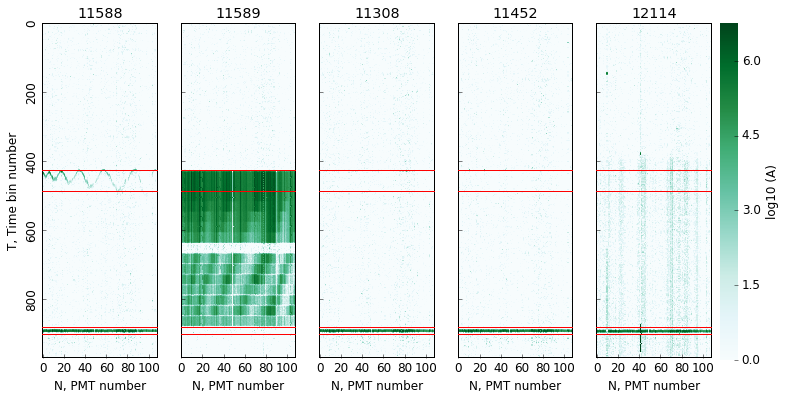

In [399]:
print_frames(nframe)
#plt.savefig('frames_bad.png', bbox_inches='tight')

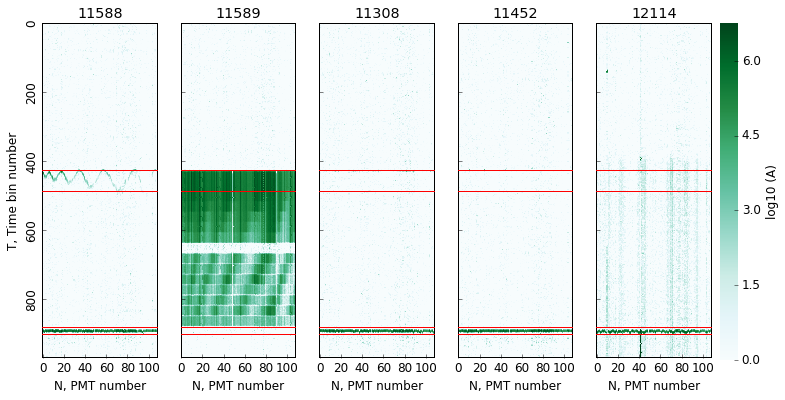

In [398]:
print_frames(frame)

In [366]:
datum11588.head()

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,0.0001,0.0001,0.0001,0.0001,1.1000,0.5000,0.0001,0.9500,1.05,0.3800,...,0.09,0.0001,0.0001,0.0001,0.5400,0.0001,1.0700,0.0001,0.0001,0.0001
1,0.1900,0.9800,0.0001,0.0001,0.0001,0.5500,0.9200,0.6700,0.55,0.3200,...,0.14,0.2000,0.6800,0.0001,0.4800,0.0001,0.6800,0.0001,0.0001,0.0001
2,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.8400,0.9500,0.05,0.3800,...,1.09,0.6000,0.6100,0.0001,0.5400,0.3100,1.0700,0.0001,0.0001,0.0500
3,0.1900,0.0001,0.1200,0.8000,0.0001,0.0001,0.0001,0.0001,0.55,0.0001,...,0.14,0.2000,0.6800,0.0001,0.4800,0.0001,0.0001,0.5800,0.0001,0.0001
4,0.1300,0.0001,0.4700,0.6400,0.1000,0.0001,0.0001,0.0001,0.05,0.0001,...,0.09,0.0001,0.0001,0.0900,0.0001,0.0001,0.0700,0.0001,0.6900,0.0500


In [270]:
newframe.head

0.0001